In [64]:
import warnings
warnings.filterwarnings("ignore")


In [65]:
import pandas as pd
aggregated_data = pd.read_csv('host_level_aggregated_chicago_data.csv')

In [66]:
aggregated_data.shape

(42558, 35)

In [67]:
print(aggregated_data.isnull().sum())

Airbnb Host ID                     0
superhost_period_all               0
Superhost                          0
Airbnb Property ID                 0
superhost_change                   0
superhost_change_lose_superhost    0
superhost_change_gain_superhost    0
rating_ave_pastYear                0
numReviews_pastYear                0
numCancel_pastYear                 0
num_5_star_Rev_pastYear            0
prop_5_StarReviews_pastYear        0
numReservedDays_pastYear           0
numReserv_pastYear                 0
available_days                     0
available_days_aveListedPrice      0
booked_days                        0
booked_days_avePrice               0
Property Type                      0
Listing Type                       0
Bedrooms                           0
Bathrooms                          0
Neighborhood                       0
Max Guests                         0
Cleaning Fee (USD)                 0
Minimum Stay                       0
Number of Photos                   0
P

---

## Creating Next Period Superhost column

In [68]:
# Sorting the dataframe by Host ID and period
aggregated_data = aggregated_data.sort_values(by=['Airbnb Host ID', 'superhost_period_all'])

aggregated_data['Next_Period_Superhost'] = aggregated_data.groupby('Airbnb Host ID')['Superhost'].shift(-1)

# Check for missing values and handle them as needed
aggregated_data = aggregated_data.drop_duplicates()

In [69]:
# Save the aggregated data to a CSV file
output_file_path = 'next_period_superhost.csv'
aggregated_data.to_csv(output_file_path, index=False)

print(f"Aggregated data has been exported to {output_file_path}")

Aggregated data has been exported to next_period_superhost.csv


In [70]:
# Identify the maximum period for each host
aggregated_data['max_period'] = aggregated_data.groupby('Airbnb Host ID')['superhost_period_all'].transform('max')

# Remove rows where the current period is the last period for the host
aggregated_data = aggregated_data[aggregated_data['superhost_period_all'] != aggregated_data['max_period']]

# Drop the temporary column used for filtering
aggregated_data = aggregated_data.drop(columns=['max_period'])

# Reset the index for the cleaned DataFrame
aggregated_data = aggregated_data.reset_index(drop=True)

print("Rows for the last period of each host have been removed.")

Rows for the last period of each host have been removed.


In [71]:
aggregated_data.head()

,Airbnb Host ID,superhost_period_all,Superhost,Airbnb Property ID,superhost_change,superhost_change_lose_superhost,superhost_change_gain_superhost,rating_ave_pastYear,numReviews_pastYear,numCancel_pastYear,...,Number of Photos,Pets Allowed,Instantbook Enabled,Nightly Rate,Number of Reviews,Rating Overall,revenue,occupancy_rate,property_age_months,Next_Period_Superhost
0,2153.0,5.0,0.0,2,0.0,0.0,0.0,4.655172,29.0,0.0,...,6.0,False,0,80.0,3.0,96.500000,546.5,0.370000,23.0,0.0
1,2153.0,12.0,0.0,4,0.0,0.0,0.0,5.000000,1.0,0.0,...,6.5,False,1,58.0,2.5,92.672625,455.0,0.412277,52.0,0.0
2,2153.0,13.0,0.0,3,0.0,0.0,0.0,5.000000,2.0,0.0,...,8.0,False,1,88.0,4.0,93.783084,1682.0,0.211219,28.0,0.0
3,2153.0,14.0,0.0,5,0.0,0.0,0.0,5.000000,10.0,1.0,...,8.0,False,0,55.0,1.0,95.981039,1560.0,0.213357,5.0,0.0
4,2153.0,15.0,0.0,1,0.0,0.0,0.0,5.000000,12.0,1.0,...,6.0,False,1,84.0,1.0,100.000000,1370.0,0.474576,45.0,0.0


In [72]:
# Save the aggregated data to a CSV file
output_file_path = 'next_period_superhost_train_test_set.csv'
aggregated_data.to_csv(output_file_path, index=False)

print(f"Aggregated data has been exported to {output_file_path}")

Aggregated data has been exported to next_period_superhost_train_test_set.csv


---

## Logistic Regression

Preprocessing data...
Splitting dataset into training and testing...
Training the model using GridSearchCV...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/vishnuanand/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vishnuanand/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vishnuanand/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vishnuanand/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vishnua

Best Parameters: {'classifier__C': 5, 'classifier__solver': 'lbfgs'}
Generating training predictions and probabilities...
Generating testing predictions and probabilities...

Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.80      0.83     11343
         1.0       0.80      0.86      0.83     10622

    accuracy                           0.83     21965
   macro avg       0.83      0.83      0.83     21965
weighted avg       0.83      0.83      0.83     21965


Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.75      0.79      4590
         1.0       0.85      0.90      0.87      7125

    accuracy                           0.84     11715
   macro avg       0.84      0.82      0.83     11715
weighted avg       0.84      0.84      0.84     11715


Test Confusion Matrix:
 [[3435 1155]
 [ 712 6413]]

Training AUC: 0.9138
Testing AUC: 0.9136
Plotting ROC c

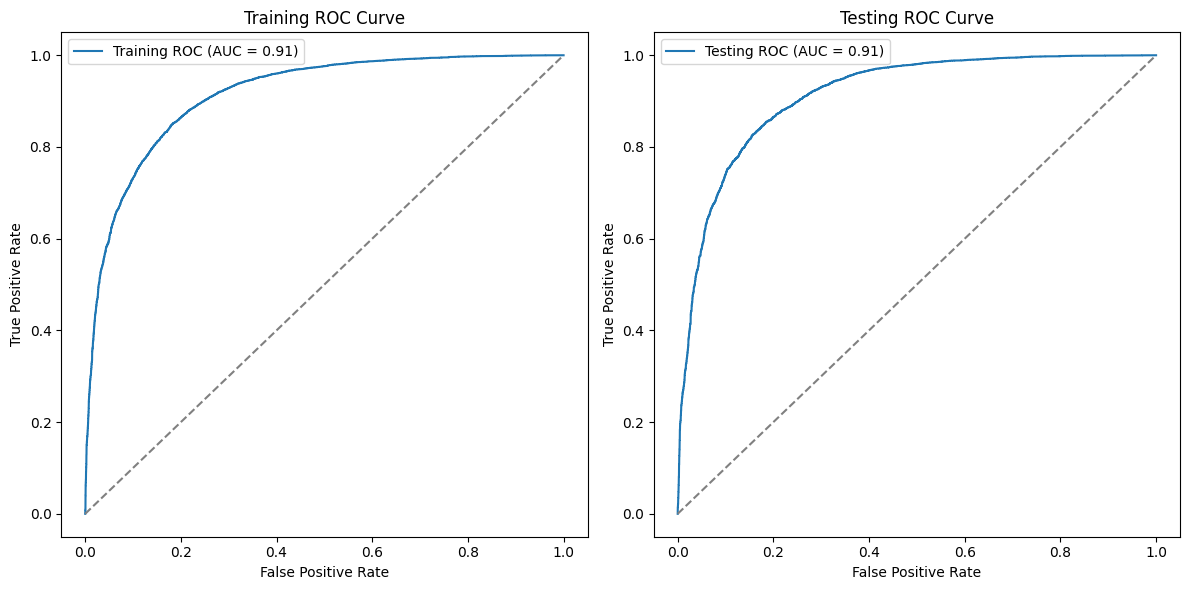

In [73]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Define the categorical and numerical columns
categorical_cols = ['Property Type', 'Listing Type', 'Neighborhood', 'Pets Allowed', 'Instantbook Enabled']
numerical_cols = [
    'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear',
    'prop_5_StarReviews_pastYear', 'numReservedDays_pastYear', 'numReserv_pastYear', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice', 'Bedrooms', 'Bathrooms',
    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos', 'Nightly Rate',
    'Number of Reviews', 'Rating Overall', 'revenue', 'occupancy_rate', 'property_age_months', 'Airbnb Property ID'
]

print("Preprocessing data...")

# Preprocessing: Scaling numerical and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Logistic regression model
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=2000)

# Pipeline to preprocess and fit the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Split dataset based on superhost_period_all
print("Splitting dataset into training and testing...")
training_data = aggregated_data[aggregated_data['superhost_period_all'] <= 14]
testing_data = aggregated_data[(aggregated_data['superhost_period_all'] >= 15) & (aggregated_data['superhost_period_all'] <= 19)]

X_train = training_data[categorical_cols + numerical_cols]
y_train = training_data['Next_Period_Superhost']

X_test = testing_data[categorical_cols + numerical_cols]
y_test = testing_data['Next_Period_Superhost']

# # Hyperparameter grid for logistic regression
# param_grid = {
#     'classifier__C': [0.05, 0.1, 0.5, 1, 5],
#     'classifier__solver': ['liblinear', 'lbfgs']
# }

# Hyperparameter grid for logistic regression
param_grid = {
    'classifier__C': [5],
    'classifier__solver': ['lbfgs']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit the model with GridSearchCV on training data
print("Training the model using GridSearchCV...")
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
logistic_best_model = grid_search.best_estimator_

# Training predictions and probabilities
print("Generating training predictions and probabilities...")
y_train_prob = logistic_best_model.predict_proba(X_train)[:, 1]
y_train_pred = logistic_best_model.predict(X_train)

# Testing predictions and probabilities
print("Generating testing predictions and probabilities...")
y_test_prob = logistic_best_model.predict_proba(X_test)[:, 1]
y_test_pred = logistic_best_model.predict(X_test)

# Model evaluation
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Compute AUC for training and testing
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"\nTraining AUC: {train_auc:.4f}")
print(f"Testing AUC: {test_auc:.4f}")

# Plot ROC curves for training and testing
print("Plotting ROC curves...")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
axes[0].plot(fpr_train, tpr_train, label=f"Training ROC (AUC = {train_auc:.2f})")
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_title("Training ROC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend()

# Testing ROC curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
axes[1].plot(fpr_test, tpr_test, label=f"Testing ROC (AUC = {test_auc:.2f})")
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("Testing ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()

plt.tight_layout()
plt.show()

### Prediction for 20th period for logistic regression model

In [74]:

# Read next_period_superhost.csv and filter for period 20
next_period_data = pd.read_csv('next_period_superhost.csv')
next_period_data = next_period_data[next_period_data['superhost_period_all'] == 20]

# Extract features for prediction
X_pred = next_period_data[categorical_cols + numerical_cols]

# Prediction probabilities for the 20th period
y_pred_prob = logistic_best_model.predict_proba(X_pred)[:, 1]
y_pred = logistic_best_model.predict(X_pred)

# Add predictions to the DataFrame
next_period_data['Predicted_Superhost_Status'] = y_pred
next_period_data['Predicted_Probabilities'] = y_pred_prob

# Display predictions for the 20th period
print("Predictions for the 20th period:\n", next_period_data[['Airbnb Host ID', 'superhost_period_all', 'Predicted_Superhost_Status', 'Predicted_Probabilities']])

Predictions for the 20th period:
        Airbnb Host ID  superhost_period_all  Predicted_Superhost_Status  \
9              2153.0                  20.0                         0.0   
25             2613.0                  20.0                         1.0   
42             3908.0                  20.0                         1.0   
58             4434.0                  20.0                         0.0   
76             5775.0                  20.0                         1.0   
...               ...                   ...                         ...   
42553     336504529.0                  20.0                         1.0   
42554     336859702.0                  20.0                         1.0   
42555     337475785.0                  20.0                         1.0   
42556     339780324.0                  20.0                         0.0   
42557     339971460.0                  20.0                         0.0   

       Predicted_Probabilities  
9                 2.348374e-01  

### Feature importance for logistic regression model


Top 20 Features Based on Coefficients:
                                       Feature  Importance
1                         numReviews_pastYear   21.028644
3                     num_5_star_Rev_pastYear   20.641490
2                          numCancel_pastYear    2.921606
28                       Property Type_Castle    2.765278
54    Property Type_Private room in townhouse    2.558533
128           Neighborhood_Washington Heights    2.116076
37                  Property Type_Entire loft    2.041490
69                Neighborhood_Archer Heights    1.915168
27                    Property Type_Camper/RV    1.460302
85                      Neighborhood_Clearing    1.394076
59   Property Type_Room in serviced apartment    1.118588
90                     Neighborhood_Gage Park    1.079476
60           Property Type_Serviced apartment    1.026084
47                        Property Type_Other    1.015103
24            Property Type_Bed_and_Breakfast    0.962212
79                 Neighborhood

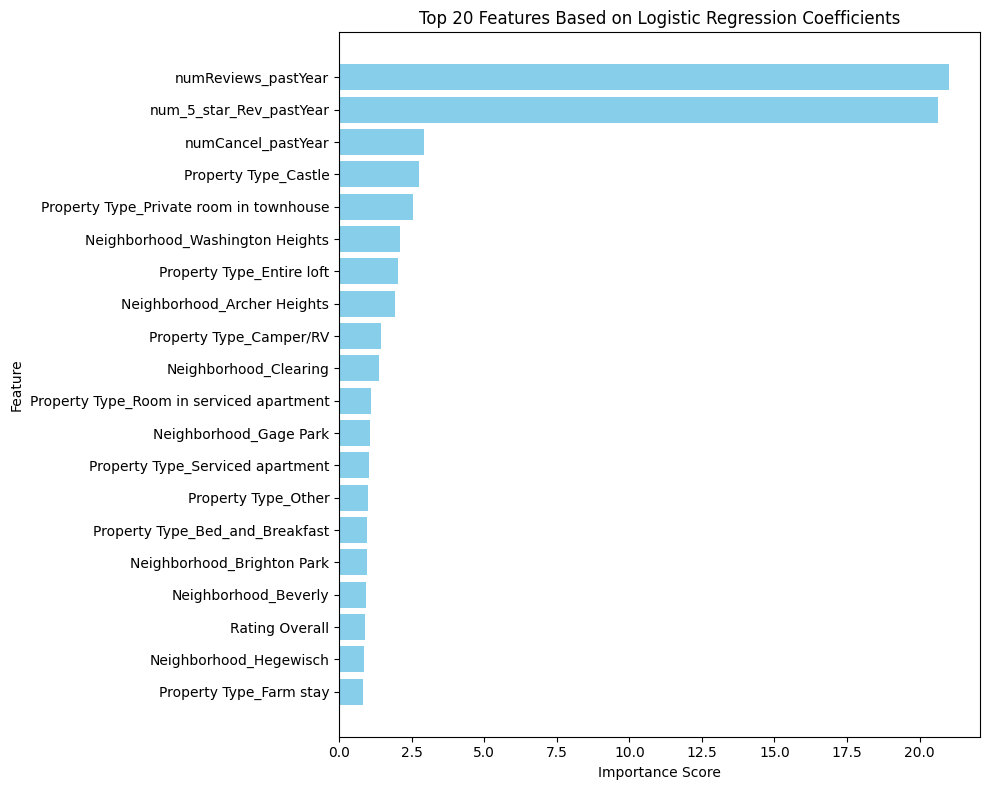

In [75]:
# Extract the coefficients of the logistic regression model
coefficients = logistic_best_model.named_steps['classifier'].coef_[0]

# Check if one-hot encoding was used and retrieve feature names from the preprocessor
if isinstance(logistic_best_model.named_steps['preprocessor'].named_transformers_['cat'], OneHotEncoder):
    # Get the one-hot encoding feature names
    one_hot_encoder = logistic_best_model.named_steps['preprocessor'].named_transformers_['cat']
    
    # Check for the appropriate method to use based on the scikit-learn version
    if hasattr(one_hot_encoder, 'get_feature_names_out'):  # For scikit-learn 0.21 and later
        encoded_cols = one_hot_encoder.get_feature_names_out(input_features=categorical_cols)
    else:  # For older versions of scikit-learn
        encoded_cols = one_hot_encoder.get_feature_names(input_features=categorical_cols)
    
    # Combine numerical and one-hot encoded categorical feature names
    feature_names = numerical_cols + list(encoded_cols)
else:
    # If one-hot encoding wasn't used, the feature names are just the columns of X_train
    feature_names = list(X_train.columns)

# Take the absolute values of the coefficients as importance scores
importance = abs(coefficients)

# Ensure that the lengths of feature_names and importance match
if len(feature_names) == len(importance):
    # Create a DataFrame for feature importance
    feature_importance_df_logistic = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    })

    # Sort the DataFrame by importance in descending order
    feature_importance_df_logistic = feature_importance_df_logistic.sort_values(by='Importance', ascending=False)

    # Print the top 20 features
    print("\nTop 20 Features Based on Coefficients:\n", feature_importance_df_logistic.head(20))

    # Visualize the top 20 features
    top_20_features = feature_importance_df_logistic.head(20)
    plt.figure(figsize=(10, 8))
    plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Top 20 Features Based on Logistic Regression Coefficients')
    plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
    plt.tight_layout()
    plt.show()
else:
    print("Error: The lengths of feature_names and importance do not match.")

---

## Random forest model

In [76]:
import warnings
warnings.filterwarnings("ignore")

Starting GridSearchCV...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END bootstrap=True, max_depth=10, max_features=0.3, max_samples=0.7, n_estimators=700;, score=0.985 total time=  18.4s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=0.3, max_samples=0.7, n_estimators=700;, score=0.979 total time=  18.4s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=0.3, max_samples=0.7, n_estimators=700;, score=0.978 total time=  18.5s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=0.3, max_samples=0.7, n_estimators=700;, score=0.979 total time=  18.2s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=0.3, max_samples=0.7, n_estimators=700;, score=0.983 total time=  18.3s
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 0.3, 'max_samples': 0.7, 'n_estimators': 700}

Feature Importances (Top 10):
prop_5_StarReviews_pastYear: 0.2533
numCancel_pastYear: 0.2049
rating_ave_pastYear: 0.1310
num_5_star_Rev_pastYear: 0.1275
numRev

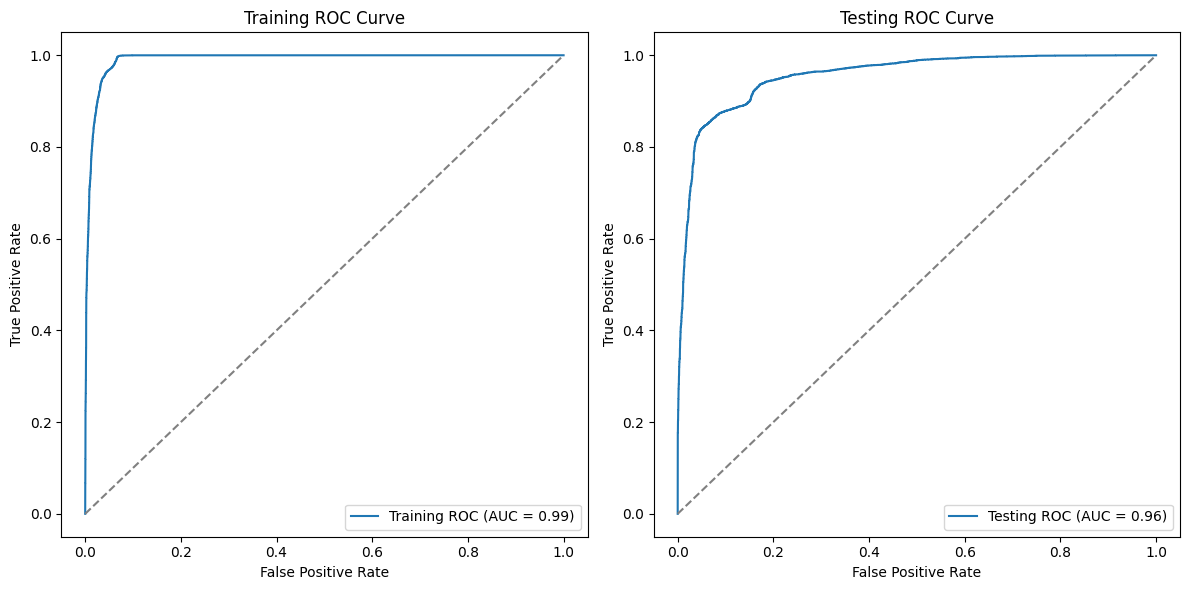

In [77]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Define the categorical and numerical columns
categorical_cols = ['Property Type', 'Listing Type', 'Neighborhood', 'Pets Allowed', 'Instantbook Enabled']
numerical_cols = [
    'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear',
    'prop_5_StarReviews_pastYear', 'numReservedDays_pastYear', 'numReserv_pastYear', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice', 'Bedrooms', 'Bathrooms',
    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos', 'Nightly Rate',
    'Number of Reviews', 'Rating Overall', 'revenue', 'occupancy_rate', 'property_age_months', 'Airbnb Property ID'
]

# Preprocess the dataset
def preprocess_data(df, categorical_cols, numerical_cols, reference_columns=None):
    # Convert categorical columns to dummy variables
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    # Standardize numerical columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    # Align columns with reference_columns (if provided)
    if reference_columns is not None:
        # Add missing columns with zeros
        for col in reference_columns:
            if col not in df.columns:
                df[col] = 0
        # Remove extra columns
        df = df[reference_columns]
    
    return df

# Split dataset based on superhost_period_all
training_data = aggregated_data[aggregated_data['superhost_period_all'] <= 14]
testing_data = aggregated_data[(aggregated_data['superhost_period_all'] >= 15) & (aggregated_data['superhost_period_all'] <= 19)]

# Preprocess training data
X_train = preprocess_data(training_data[categorical_cols + numerical_cols], categorical_cols, numerical_cols)
y_train = training_data['Superhost']

# Store reference columns for alignment
reference_columns = X_train.columns

# Preprocess testing data and align with training data columns
X_test = preprocess_data(testing_data[categorical_cols + numerical_cols], categorical_cols, numerical_cols, reference_columns)
y_test = testing_data['Superhost']

# Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# # Set up the Random Forest model with hyperparameter tuning
# param_grid = {
#     'n_estimators': [300, 500, 700],
#     'max_depth': [6, 8, 10],
#     'max_features': [0.3, 0.5, 0.7],
#     'bootstrap': [True],
#     'max_samples': [0.6, 0.7, 0.8]
# }

# Set up the Random Forest model with hyperparameter tuning
param_grid = {
    'n_estimators': [700],
    'max_depth': [10],
    'max_features': [0.3],
    'bootstrap': [True],
    'max_samples': [0.7]
}

# Initialize GridSearchCV with higher verbosity
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=3,
    n_jobs=-1
)

# Fit the model with GridSearchCV
print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
random_forest_best_model = grid_search.best_estimator_
print("\nFeature Importances (Top 10):")
feature_importances = random_forest_best_model.feature_importances_
# Extract feature names
feature_names = list(X_train.columns)
sorted_indices = np.argsort(feature_importances)[::-1]
for idx in sorted_indices[:10]:
    print(f"{feature_names[idx]}: {feature_importances[idx]:.4f}")

# Training predictions and probabilities
y_train_prob = random_forest_best_model.predict_proba(X_train)[:, 1]
y_train_pred = random_forest_best_model.predict(X_train)

# Testing predictions and probabilities
y_test_prob = random_forest_best_model.predict_proba(X_test)[:, 1]
y_test_pred = random_forest_best_model.predict(X_test)

# Model evaluation
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Compute AUC for training and testing
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"\nTraining AUC: {train_auc:.4f}")
print(f"Testing AUC: {test_auc:.4f}")

# Plot ROC curves side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
axes[0].plot(fpr_train, tpr_train, label=f"Training ROC (AUC = {train_auc:.2f})")
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_title("Training ROC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend()

# Testing ROC curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
axes[1].plot(fpr_test, tpr_test, label=f"Testing ROC (AUC = {test_auc:.2f})")
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("Testing ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()

plt.tight_layout()
plt.show()

### Predicting for 20th period with random forest model

In [78]:
# Read next_period_superhost.csv and filter for period 20
next_period_data = pd.read_csv('next_period_superhost.csv')
next_period_data = next_period_data[next_period_data['superhost_period_all'] == 20]

# Preprocess next_period_data and align with training data columns
X_pred = preprocess_data(next_period_data[categorical_cols + numerical_cols], categorical_cols, numerical_cols, reference_columns)

# Prediction probabilities for the 20th period
y_pred_prob = random_forest_best_model.predict_proba(X_pred)[:, 1]
y_pred = random_forest_best_model.predict(X_pred)

# Add predictions to the DataFrame
next_period_data['Predicted_Superhost_Status'] = y_pred
next_period_data['Predicted_Probabilities'] = y_pred_prob

# Display predictions for the 20th period
print("Predictions for the 20th period:\n", next_period_data[['Airbnb Host ID', 'superhost_period_all', 'Predicted_Superhost_Status', 'Predicted_Probabilities']])

Predictions for the 20th period:
        Airbnb Host ID  superhost_period_all  Predicted_Superhost_Status  \
9              2153.0                  20.0                         0.0   
25             2613.0                  20.0                         1.0   
42             3908.0                  20.0                         1.0   
58             4434.0                  20.0                         0.0   
76             5775.0                  20.0                         1.0   
...               ...                   ...                         ...   
42553     336504529.0                  20.0                         1.0   
42554     336859702.0                  20.0                         0.0   
42555     337475785.0                  20.0                         0.0   
42556     339780324.0                  20.0                         0.0   
42557     339971460.0                  20.0                         0.0   

       Predicted_Probabilities  
9                     0.043079  

### Feature importance using random forest model


Top 20 Features Based on Random Forest Importance:
                           Feature  Importance
4     prop_5_StarReviews_pastYear    0.253270
2              numCancel_pastYear    0.204899
0             rating_ave_pastYear    0.130974
3         num_5_star_Rev_pastYear    0.127498
1             numReviews_pastYear    0.120655
19                 Rating Overall    0.039033
6              numReserv_pastYear    0.029815
18              Number of Reviews    0.022383
5        numReservedDays_pastYear    0.012196
16               Number of Photos    0.005540
22            property_age_months    0.005089
21                 occupancy_rate    0.004099
7                  available_days    0.004062
17                   Nightly Rate    0.003756
8   available_days_aveListedPrice    0.003692
10           booked_days_avePrice    0.003615
20                        revenue    0.003342
9                     booked_days    0.003295
14             Cleaning Fee (USD)    0.003035
13                     Max 

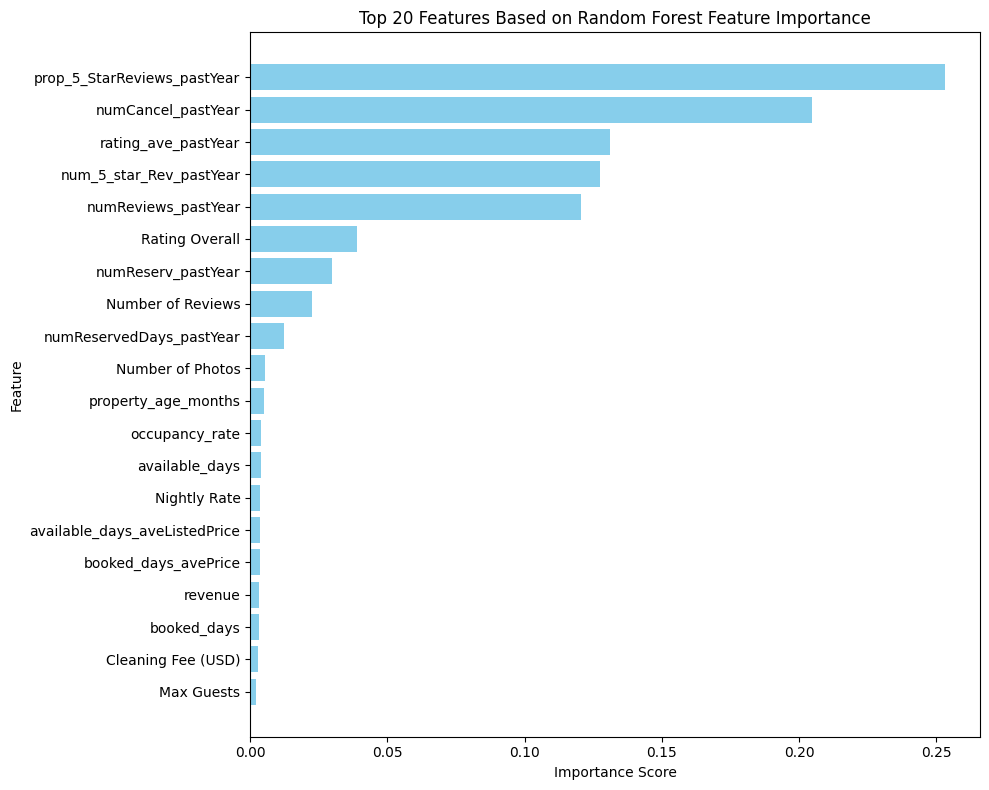

In [79]:
# Extract the feature importances from the Random Forest model
feature_importances = random_forest_best_model.feature_importances_

# Use the columns from the training data
feature_names = list(X_train.columns)

# Ensure that the lengths of feature_names and importances match
if len(feature_names) == len(feature_importances):
    # Create a DataFrame for feature importance
    feature_importance_df_random_forest = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    # Sort the DataFrame by importance in descending order
    feature_importance_df_random_forest = feature_importance_df_random_forest.sort_values(by='Importance', ascending=False)

    # Print the top 20 features
    print("\nTop 20 Features Based on Random Forest Importance:\n", feature_importance_df_random_forest.head(20))

    # Visualize the top 20 features
    top_20_features = feature_importance_df_random_forest.head(20)
    plt.figure(figsize=(10, 8))
    plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Top 20 Features Based on Random Forest Feature Importance')
    plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
    plt.tight_layout()
    plt.show()
else:
    print("Error: The lengths of feature_names and feature_importances do not match.")

---

## Gradient Boosted Trees Model

Starting GridSearchCV...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=0.3, n_estimators=300, subsample=0.9;, score=0.982 total time=   9.0s
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=0.3, n_estimators=300, subsample=0.9;, score=0.979 total time=   9.0s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=0.3, n_estimators=300, subsample=0.9;, score=0.984 total time=   9.1s
[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=0.3, n_estimators=300, subsample=0.9;, score=0.980 total time=   9.1s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=0.3, n_estimators=300, subsample=0.9;, score=0.980 total time=   9.1s
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 0.3, 'n_estimators': 300, 'subsample': 0.9}

Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      4905
         1.0   

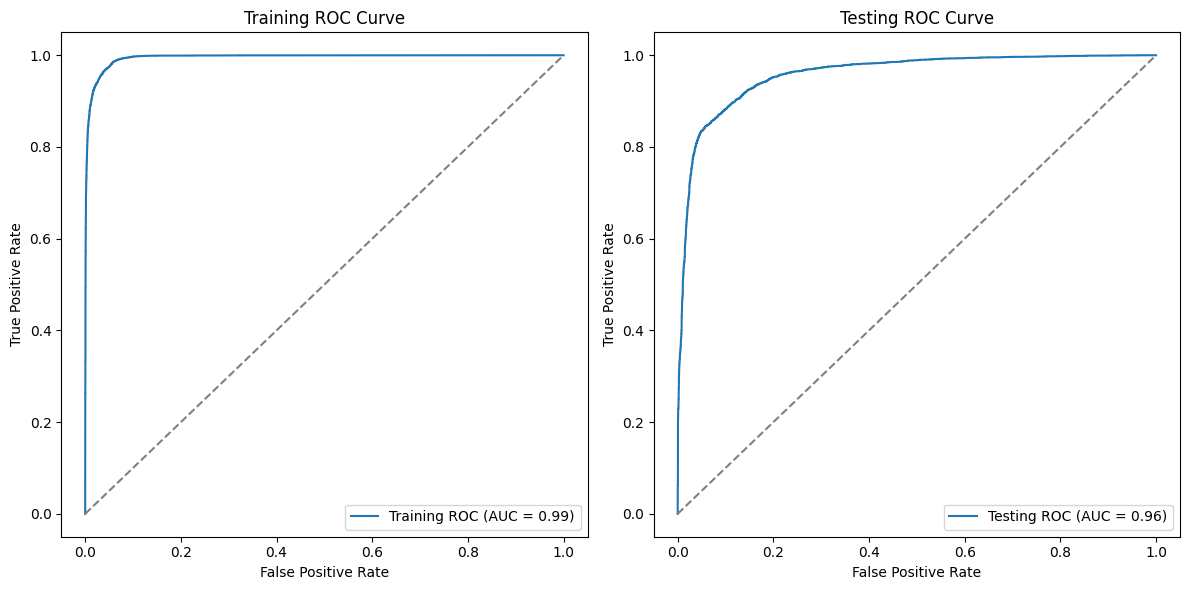

In [80]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Define the categorical and numerical columns
categorical_cols = ['Property Type', 'Listing Type', 'Neighborhood', 'Pets Allowed', 'Instantbook Enabled']
numerical_cols = [
    'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear',
    'prop_5_StarReviews_pastYear', 'numReservedDays_pastYear', 'numReserv_pastYear', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice', 'Bedrooms', 'Bathrooms',
    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos', 'Nightly Rate',
    'Number of Reviews', 'Rating Overall', 'revenue', 'occupancy_rate', 'property_age_months'
]

# Preprocess the dataset
def preprocess_data(df, categorical_cols, numerical_cols, reference_columns=None):
    # Convert categorical columns to dummy variables
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    # Standardize numerical columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    # Align columns with reference_columns (if provided)
    if reference_columns is not None:
        # Add missing columns with zeros
        for col in reference_columns:
            if col not in df.columns:
                df[col] = 0
        # Remove extra columns
        df = df[reference_columns]
    
    return df

# Split dataset based on superhost_period_all
training_data = aggregated_data[aggregated_data['superhost_period_all'] <= 14]
testing_data = aggregated_data[(aggregated_data['superhost_period_all'] >= 15) & (aggregated_data['superhost_period_all'] <= 19)]

# Preprocess training data
X_train = preprocess_data(training_data[categorical_cols + numerical_cols], categorical_cols, numerical_cols)
y_train = training_data['Superhost']

# Store reference columns for alignment
reference_columns = X_train.columns

# Preprocess testing data and align with training data columns
X_test = preprocess_data(testing_data[categorical_cols + numerical_cols], categorical_cols, numerical_cols, reference_columns)
y_test = testing_data['Superhost']

# Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# # Hyperparameter grid for Gradient Boosting
# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'subsample': [0.8, 0.9, 1.0],
#     'max_features': [0.3, 0.5, 0.7]
# }

# Hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [300],
    'max_depth': [5],
    'learning_rate': [0.05],
    'subsample': [0.9],
    'max_features': [0.3]
}

# Initialize GridSearchCV with higher verbosity
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=3,
    n_jobs=-1
)

# Fit the model with GridSearchCV
print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
gradient_boosted_best_model = grid_search.best_estimator_

# Training predictions and probabilities
y_train_prob = gradient_boosted_best_model.predict_proba(X_train)[:, 1]
y_train_pred = gradient_boosted_best_model.predict(X_train)

# Testing predictions and probabilities
y_test_prob = gradient_boosted_best_model.predict_proba(X_test)[:, 1]
y_test_pred = gradient_boosted_best_model.predict(X_test)

# Model evaluation
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Compute AUC for training and testing
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"\nTraining AUC: {train_auc:.4f}")
print(f"Testing AUC: {test_auc:.4f}")

# Plot ROC curves side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
axes[0].plot(fpr_train, tpr_train, label=f"Training ROC (AUC = {train_auc:.2f})")
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_title("Training ROC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend()

# Testing ROC curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
axes[1].plot(fpr_test, tpr_test, label=f"Testing ROC (AUC = {test_auc:.2f})")
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("Testing ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()

plt.tight_layout()
plt.show()

### Predict 20th period using gradient boosted trees

In [81]:
# Read next_period_superhost.csv and filter for period 20
next_period_data = pd.read_csv('next_period_superhost.csv')
next_period_data = next_period_data[next_period_data['superhost_period_all'] == 20]

# Preprocess next_period_data and align with training data columns
X_pred = preprocess_data(next_period_data[categorical_cols + numerical_cols], categorical_cols, numerical_cols, reference_columns)

# Prediction probabilities for the 20th period
y_pred_prob = gradient_boosted_best_model.predict_proba(X_pred)[:, 1]
y_pred = gradient_boosted_best_model.predict(X_pred)

# Add predictions to the DataFrame
next_period_data['Predicted_Superhost_Status'] = y_pred
next_period_data['Predicted_Probabilities'] = y_pred_prob

# Display predictions for the 20th period
print("Predictions for the 21th period:\n", next_period_data[['Airbnb Host ID', 'superhost_period_all', 'Predicted_Superhost_Status', 'Predicted_Probabilities']])

Predictions for the 21th period:
        Airbnb Host ID  superhost_period_all  Predicted_Superhost_Status  \
9              2153.0                  20.0                         0.0   
25             2613.0                  20.0                         1.0   
42             3908.0                  20.0                         1.0   
58             4434.0                  20.0                         0.0   
76             5775.0                  20.0                         1.0   
...               ...                   ...                         ...   
42553     336504529.0                  20.0                         1.0   
42554     336859702.0                  20.0                         0.0   
42555     337475785.0                  20.0                         0.0   
42556     339780324.0                  20.0                         0.0   
42557     339971460.0                  20.0                         0.0   

       Predicted_Probabilities  
9                     0.011814  

In [82]:
next_period_data[['Airbnb Host ID', 'superhost_period_all', 'Predicted_Superhost_Status', 'Predicted_Probabilities']]

,Airbnb Host ID,superhost_period_all,Predicted_Superhost_Status,Predicted_Probabilities
9,2153.0,20.0,0.0,0.011814
25,2613.0,20.0,1.0,0.991396
42,3908.0,20.0,1.0,0.933535
58,4434.0,20.0,0.0,0.008699
76,5775.0,20.0,1.0,0.977237
...,...,...,...,...
42553,336504529.0,20.0,1.0,0.846648
42554,336859702.0,20.0,0.0,0.240317
42555,337475785.0,20.0,0.0,0.188646
42556,339780324.0,20.0,0.0,0.004700


### Calculating number of superhosts in period 21

In [83]:
# Count actual superhosts and non-superhosts in Period 20
actual_superhosts_period_20 = next_period_data[next_period_data['Superhost'] == 1].shape[0]
actual_non_superhosts_period_20 = next_period_data[next_period_data['Superhost'] == 0].shape[0]

# Use the predicted superhost status as Period 21 status
predicted_superhosts_period_21 = next_period_data[next_period_data['Predicted_Superhost_Status'] == 1].shape[0]
predicted_non_superhosts_period_21 = next_period_data[next_period_data['Predicted_Superhost_Status'] == 0].shape[0]

# Print the results
print(f"Period 20 - Actual Superhosts: {actual_superhosts_period_20}")
print(f"Period 20 - Actual Non-Superhosts: {actual_non_superhosts_period_20}")
print(f"Period 21 - Predicted Superhosts: {predicted_superhosts_period_21}")
print(f"Period 21 - Predicted Non-Superhosts: {predicted_non_superhosts_period_21}")

Period 20 - Actual Superhosts: 1235
Period 20 - Actual Non-Superhosts: 953
Period 21 - Predicted Superhosts: 1281
Period 21 - Predicted Non-Superhosts: 907


### Feature importance using gradient boosted trees


Top 20 Features Based on Gradient Boosting Importance:
                           Feature  Importance
4     prop_5_StarReviews_pastYear    0.242190
2              numCancel_pastYear    0.213858
0             rating_ave_pastYear    0.137325
3         num_5_star_Rev_pastYear    0.133450
1             numReviews_pastYear    0.133201
19                 Rating Overall    0.033725
18              Number of Reviews    0.030933
6              numReserv_pastYear    0.021159
5        numReservedDays_pastYear    0.011114
16               Number of Photos    0.006446
10           booked_days_avePrice    0.002985
8   available_days_aveListedPrice    0.002835
17                   Nightly Rate    0.002827
7                  available_days    0.002654
21                 occupancy_rate    0.002652
14             Cleaning Fee (USD)    0.002465
20                        revenue    0.002436
22            property_age_months    0.002273
9                     booked_days    0.001428
13                     

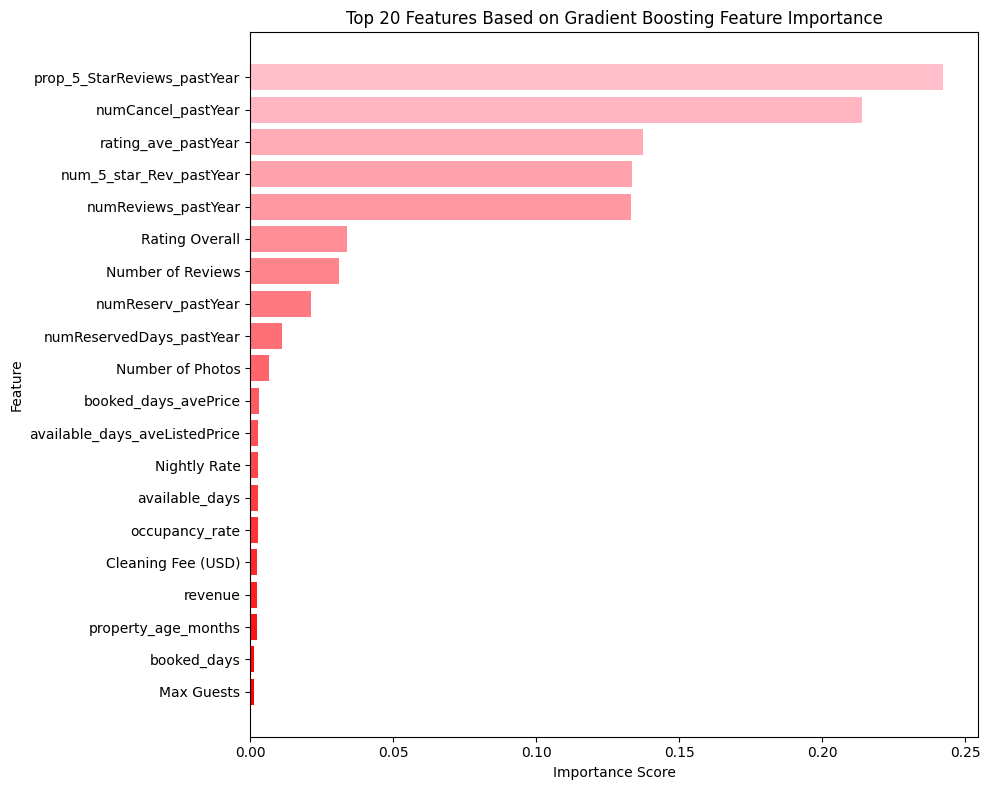

In [84]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Extract the feature importances from the Gradient Boosting model
feature_importances = gradient_boosted_best_model.feature_importances_

# Use the columns from the training data
feature_names = list(X_train.columns)

# Ensure that the lengths of feature_names and importances match
if len(feature_names) == len(feature_importances):
    # Create a DataFrame for feature importance
    feature_importance_df_gb = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    # Sort the DataFrame by importance in descending order
    feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

    # Print the top 20 features
    print("\nTop 20 Features Based on Gradient Boosting Importance:\n", feature_importance_df_gb.head(20))

    # Visualize the top 20 features
    top_20_features = feature_importance_df_gb.head(20)

    # Create a gradient of blue
    colors = mcolors.LinearSegmentedColormap.from_list("", ["pink", "red"])(np.linspace(0, 1, len(top_20_features)))

    plt.figure(figsize=(10, 8))
    plt.barh(top_20_features['Feature'], top_20_features['Importance'], color=colors)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Top 20 Features Based on Gradient Boosting Feature Importance')
    plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
    plt.tight_layout()
    plt.show()
else:
    print("Error: The lengths of feature_names and feature_importances do not match.")

---

## Feature importance comparison of random forest model and gradient boosted trees model

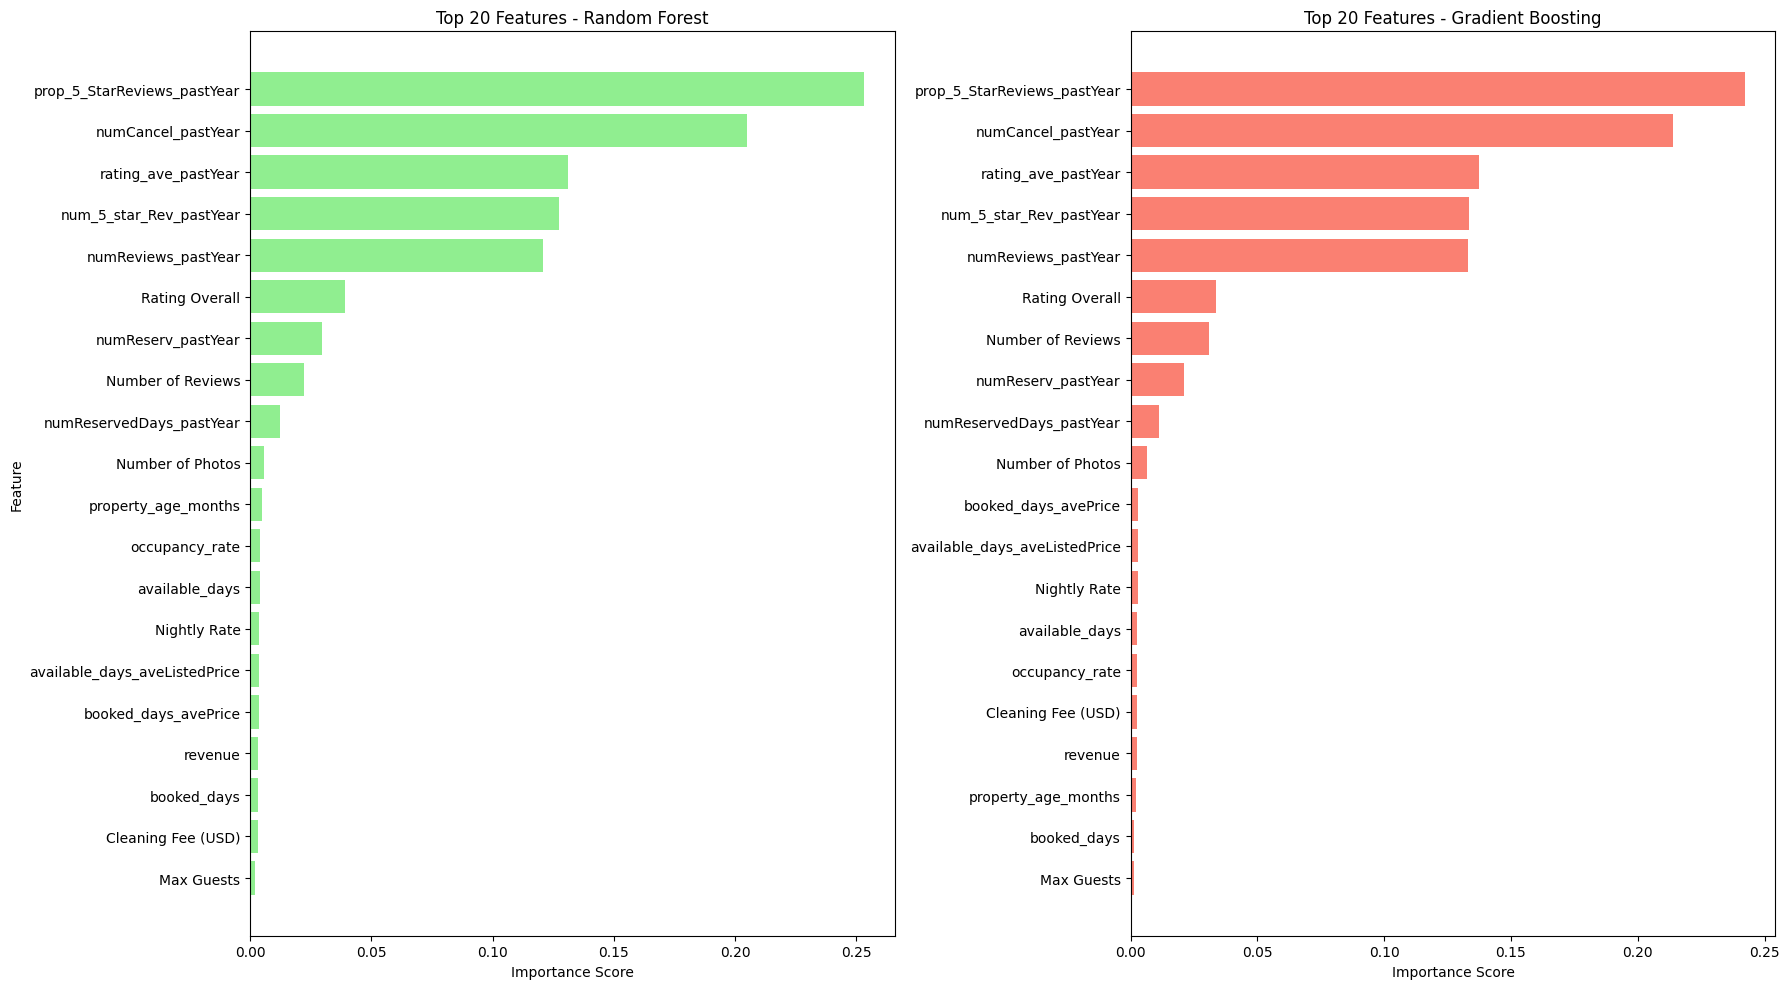

In [85]:
import matplotlib.pyplot as plt

# Subplot layout for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Random Forest Top 20 Features
top_20_rf = feature_importance_df_random_forest.head(20)
axes[0].barh(top_20_rf['Feature'], top_20_rf['Importance'], color='lightgreen')
axes[0].set_title('Top 20 Features - Random Forest')
axes[0].set_xlabel('Importance Score')
axes[0].set_ylabel('Feature')
axes[0].invert_yaxis()

# Gradient Boosting Top 20 Features
top_20_gb = feature_importance_df_gb.head(20)
axes[1].barh(top_20_gb['Feature'], top_20_gb['Importance'], color='salmon')
axes[1].set_title('Top 20 Features - Gradient Boosting')
axes[1].set_xlabel('Importance Score')
axes[1].invert_yaxis()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

---